In [29]:
import os
os.getcwd()
import pickle

In [30]:
os.chdir("C:\\Users\\Ani\\Desktop\\Project")
os.getcwd()

'C:\\Users\\Ani\\Desktop\\Project'

In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
dataset=pd.read_csv('pima-indians-diabetes.csv')

In [6]:
dataset.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
X=dataset.loc[:, ['preg', 'plas', 'pres','skin','test','mass','pedi','age']]
Y=dataset.loc[:, ['class']]
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
Y.head()

,class
0,1
1,0
2,1
3,0
4,1


In [9]:
X=dataset.iloc[:, :8]
Y=dataset.iloc[:, -1]

In [10]:
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [12]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=37)

In [13]:
X_train.head()

,preg,plas,pres,skin,test,mass,pedi,age
726,1,116,78,29,180,36.1,0.496,25
447,0,95,80,45,92,36.5,0.330,26
205,5,111,72,28,0,23.9,0.407,27
188,8,109,76,39,114,27.9,0.640,31
259,11,155,76,28,150,33.3,1.353,51


In [14]:
X_test.head()

,preg,plas,pres,skin,test,mass,pedi,age
369,1,133,102,28,140,32.8,0.234,45
491,2,89,90,30,0,33.5,0.292,42
65,5,99,74,27,0,29.0,0.203,32
269,2,146,0,0,0,27.5,0.240,28
432,1,80,74,11,60,30.0,0.527,22


In [15]:
Y_train.head()

726    0
447    0
205    0
188    1
259    1
Name: class, dtype: int64

In [16]:
Y_test.head()

369    1
491    0
65     0
269    1
432    0
Name: class, dtype: int64

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [18]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)
X_train_std=minmax.fit_transform(X_train)
X_test_std=minmax.transform(X_test)

C:\Machine Learning\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Machine Learning\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3, random_state=1)
rmf_clf=rmf.fit(X_train, Y_train)

C:\Machine Learning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
pickle.dump(rmf, open('model.pkl', 'wb'))
model=pickle.load(open('model.pkl', 'rb'))
print('class is:',model.predict([[6,25,72,35,50,33.6,0.627,50]]))

class is: [0]


In [21]:
rmf_clf_acc=cross_val_score(rmf_clf, X_train_std, Y_train, cv=3, scoring="accuracy", n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf, X_train_std, Y_train, cv=3, method="predict_proba")
rmf_clf_scores=rmf_proba[:, 1]

In [22]:
rmf_clf_acc

array([0.77604167, 0.74479167, 0.73958333])

In [23]:
#predict on test data
Y_pred=rmf.predict(X_test)
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [24]:
print("Actual diabetes milletus:")
print(Y_test.values)

Actual diabetes milletus:
[1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 0]


In [25]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
print("\n Accuracy Score: %f" %(accuracy_score(Y_test, Y_pred)*100))
print("\n Recall Score: %f" %(recall_score(Y_test, Y_pred)*100))
print("\n ROC Score: %f" %(roc_auc_score(Y_test, Y_pred)*100))
print(confusion_matrix(Y_test, Y_pred))


 Accuracy Score: 76.041667

 Recall Score: 48.437500

 ROC Score: 69.140625
[[115  13]
 [ 33  31]]


In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
def ROC_curve(title, Y_train, scores, label=None):
    #calculate the roc score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    #plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel("False positive rate", fontsize=16)
    plt.ylabel("False negative rate", fontsize=16)
    plt.title('ROC curve {}:'.format(title), fontsize=16)
    plt.show()

AUC Score(Random Forest Classifier): 0.81 


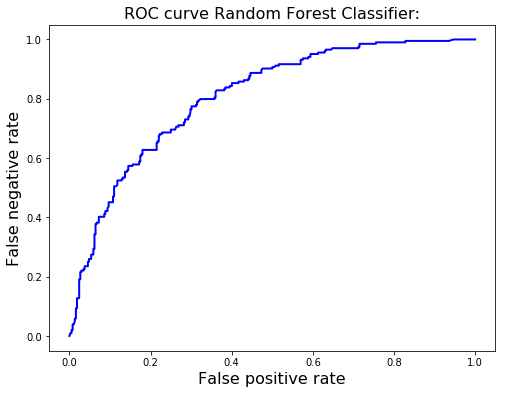

In [27]:
ROC_curve('Random Forest Classifier', Y_train, rmf_clf_scores)